### [Undirected Graph Cycle - GFG](https://www.geeksforgeeks.org/problems/detect-cycle-in-an-undirected-graph/1)


##### [DFS ▶️](https://youtu.be/UrQv5YMC060?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [7]:
from collections import defaultdict
class Solution:
    def isCycle(self, V, edges):
        def is_cycle_dfs(u, parent):
            if visited[u]:
                return True

            visited[u] = True
            for v in adj[u]:
                if v == parent:
                    continue                # Don't go back to the immediate parent
                if is_cycle_dfs(v, u):
                    return True             # Cycle found in a deeper recursion
            return False
        # ----------------------------------------------
        adj = defaultdict(list)             # Adjacency list to represent the graph
        for u, v in edges:
            adj[u].append(v)
            adj[v].append(u)
        # ----------------------------------------------
        visited = [False]*V                 # Visited array to keep track of visited nodes during DFS
        # ----------------------------------------------
        for i in range(V):                  # Iterate through all vertices to handle disconnected components
            if not visited[i]:
                if is_cycle_dfs(i, -1):     # -1 indicates no parent for the starting node
                    return True             # If a cycle is found in any component, return True
        return False                        # No cycle found in any component

# ============================================
# Test cases
V = 4
edges = [[0, 1], [0, 2], [1, 2], [2, 3]]
ss = Solution()
print(f"Cycle exists: {ss.isCycle(V, edges)}")                                          # Expected: True (due to 0-1-2-0)

V_no_cycle = 4
edges_no_cycle = [[0, 1], [0, 2], [2, 3]]
ss_no_cycle = Solution()
print(f"Cycle exists: {ss_no_cycle.isCycle(V_no_cycle, edges_no_cycle)}")               # Expected: False

V_disconnected = 5
edges_disconnected = [[0, 1], [2, 3]]
ss_disconnected = Solution()
print(f"Cycle exists: {ss_disconnected.isCycle(V_disconnected, edges_disconnected)}")   # Expected: False

Cycle exists: True
Cycle exists: False
Cycle exists: False


##### [BFS ▶️](https://youtu.be/HqIQmKKo5_I?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [8]:
from collections import defaultdict, deque

class Solution1:
    def isCycle(self, V, edges):
        def is_cycle_bfs(u):
            que = deque([[u, -1]])
            visited[u] = True
            while que:
                source, parent = que.popleft()
                for v in adj[source]:
                    if visited[v] == False:
                        visited[v] = True
                        que.append([v, source])
                    elif v != parent:
                        return True
            return False
            
        # ----------------------------------------------
        adj = defaultdict(list)             # Adjacency list to represent the graph
        for u, v in edges:
            adj[u].append(v)
            adj[v].append(u)
        # ----------------------------------------------
        visited = [False]*V                 # Visited array to keep track of visited nodes during DFS
        # ----------------------------------------------
        for i in range(V):                  # Iterate through all vertices to handle disconnected components
            if not visited[i]:
                if is_cycle_bfs(i):         # -1 indicates no parent for the starting node
                    return True             # If a cycle is found in any component, return True
        return False                        # No cycle found in any component

# ============================================
# Test cases
V = 4
edges = [[0, 1], [0, 2], [1, 2], [2, 3]]
ss = Solution1()
print(f"Cycle exists: {ss.isCycle(V, edges)}")                                          # Expected: True (due to 0-1-2-0)

V_no_cycle = 4
edges_no_cycle = [[0, 1], [0, 2], [2, 3]]
ss_no_cycle = Solution1()
print(f"Cycle exists: {ss_no_cycle.isCycle(V_no_cycle, edges_no_cycle)}")               # Expected: False

V_disconnected = 5
edges_disconnected = [[0, 1], [2, 3]]
ss_disconnected = Solution1()
print(f"Cycle exists: {ss_disconnected.isCycle(V_disconnected, edges_disconnected)}")   # Expected: False

Cycle exists: True
Cycle exists: False
Cycle exists: False


### [Directed Graph Cycle - GFG](https://www.geeksforgeeks.org/problems/detect-cycle-in-a-directed-graph/1)

##### [DFS ▶️](https://youtu.be/K_LamGUvwUc?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [9]:
from collections import defaultdict
class Solution:
    def isCycle(self, V, edges):
        
        def is_cycle_dfs(u):
            if in_recursion[u]:
                return True
            if visited[u]:
                return False
            # ---------------------
            visited[u] = True
            in_recursion[u] = True
            # ---------------------
            for v in adj[u]:
                if is_cycle_dfs(v):
                    return True
            # ---------------------
            in_recursion[u] = False
            return False
                    
            
        # ------------------------------------------------
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
        # ---------
        visited = [False]*V
        in_recursion = [False]*V
        # ---------
        for i in range(V):
            if not visited[i] and is_cycle_dfs(i):
                return True
        return False
    
# ===============================================================
V = 4
edges = [[0, 1], [0, 2], [1, 2], [2, 0], [2, 3]]
ss = Solution()
print(ss.isCycle(V, edges))     # Expected: True

V = 4
edges = [[0, 1], [0, 2], [1, 2], [2, 3]]
ss = Solution()
print(ss.isCycle(V, edges))     # Expected: False

True
False


##### [BFS ▶️](https://youtu.be/74suJP4bwf0?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [10]:
from collections import defaultdict, deque

# BFS (Kahn's algo)
class Solution:
    """
    Detects if a directed graph contains a cycle using Kahn's algorithm (topological sort).
    """
    def isCycle(self, V: int, edges: list[list[int]]) -> bool:
        """
        Checks for cycles in a directed graph.

        Args:
            V: The number of vertices in the graph.
            edges: A list of edges, where each edge is represented as [u, v]
                   indicating a directed edge from u to v.

        Returns:
            True if a cycle is detected, False otherwise.
        """
        # Create an adjacency list to represent the graph. adj[u] will store a list of all vertices v such that there is a directed edge from u to v.
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)

        # Calculate the in-degree for each vertex. indegree[i] will store the number of incoming edges for vertex i.
        indegree = [0] * V
        for u in range(V):
            for v in adj[u]:
                indegree[v] += 1

        # Initialize a queue for BFS and a counter for visited nodes. The queue will store all vertices with an in-degree of 0.
        count = 0                       # To count the number of nodes included in the topological sort
        que = deque([])

        # Add all vertices with an in-degree of 0 to the queue. These are the starting points for the topological sort.
        for i in range(V):
            if indegree[i] == 0:
                que.append(i)
                count += 1

        # Perform BFS (Kahn's algorithm)
        while que:
            u = que.popleft()           # Dequeue a vertex with an in-degree of 0

            # For each neighbor v of the current vertex u
            for v in adj[u]:
                indegree[v] -= 1        # Decrement the in-degree of v. This simulates removing the edge (u, v).
                if indegree[v] == 0:    # If the in-degree of v becomes 0, it means all its prerequisites (incoming edges) have been processed. Add v to the queue.
                    que.append(v)
                    count += 1

        # If the number of nodes included in the topological sort (count) is equal to the total number of vertices (V), it means a topological sort was possible, and thus no cycle exists.
        if count == V:
            return False
        # If count is less than V, it means there are still nodes with non-zero in-degrees that could not be processed, indicating the presence of a cycle.
        return True
    
# ===============================================================
V = 4
edges = [[0, 1], [0, 2], [1, 2], [2, 0], [2, 3]]
ss = Solution()
print(ss.isCycle(V, edges))     # Expected: True

V = 4
edges = [[0, 1], [0, 2], [1, 2], [2, 3]]
ss = Solution()
print(ss.isCycle(V, edges))     # Expected: False

True
False


### [Topological sort - GFG](https://www.geeksforgeeks.org/problems/topological-sort/1)


##### [DFS ▶️](https://youtu.be/WbbYZRr4arw?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [11]:
from collections import defaultdict
class Solution:
    
    def topoSort(self, V, edges):
        
        def dfs(u):
            visited[u] = True
            for v in adj[u]:
                if not visited[v]:
                    dfs(v)
            st.append(u)
                    
        
        # --------------------------------------
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
        # --------------------------------------
        visited = [False]*V
        st = []
        # --------------------------------------
        for i in range(V):
            if not visited[i]:
                dfs(i)
        
        return st[::-1]

# =================================================
V = 6
edges = [[1, 3], [2, 3], [4, 1], [4, 0], [5, 0], [5,2]]
ss = Solution()
print(ss.topoSort(V, edges))

V = 4
edges = [[3, 0], [1, 0], [2, 0]]
ss = Solution()
print(ss.topoSort(V, edges))

[5, 4, 2, 1, 3, 0]
[3, 2, 1, 0]


##### [BFS (Kahn's Algorithm) ▶️ ](https://youtu.be/uVl4ftleTes?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)


In [12]:
from collections import defaultdict, deque

class Solution:
    # Kahn's algorithm
    def topoSort(self, V, edges):
        # --------------------------------------
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
        # --------------------------------------
        indegree = [0]*V
        for u in range(V):
            for v in adj[u]:
                indegree[v]+=1
        # --------------------------------------
        que = deque([])
        for i in range(V):
            if indegree[i] == 0:
                que.append(i)
        # --------------------------------------
        res = []
        while que:
            u = que.popleft()
            res.append(u)
            for v in adj[u]:
                indegree[v]-=1
                if indegree[v] == 0:
                    que.append(v)
        return res
    
# =================================================
V = 6
edges = [[1, 3], [2, 3], [4, 1], [4, 0], [5, 0], [5,2]]
ss = Solution()
print(ss.topoSort(V, edges))

V = 4
edges = [[3, 0], [1, 0], [2, 0]]
ss = Solution()
print(ss.topoSort(V, edges))

[4, 5, 1, 0, 2, 3]
[1, 2, 3, 0]


### [547. Number of Provinces - Leetcode](https://leetcode.com/problems/number-of-provinces/description/)


##### [DFS ▶️](https://youtu.be/70LNE8RMPNc?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)



In [13]:
from typing import List

class Solution:
    
    def findCircleNum(self, isConnected: List[List[int]]) -> int:

        def dfs(u):
            if not visited[u]:
                visited[u] = True
                for v, i in enumerate(isConnected[u]):
                    if i == 1:
                        dfs(v)

        # ------------------------------------------
        V = len(isConnected)
        count = 0
        visited = [False]*V
        for i in range(V):
            if not visited[i]:
                count += 1
                dfs(i)
        return count
# =============================================
isConnected = [[1,0,0],[0,1,0],[0,0,1]]
ss = Solution()
print(ss.findCircleNum(isConnected))   # Expected = 3


isConnected = [[1,1,0],[1,1,0],[0,0,1]]

ss = Solution()
print(ss.findCircleNum(isConnected))   # Expected = 2

3
2


##### [BFS ▶️](https://youtu.be/YDMkSvNdB20?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [14]:
from collections import deque

class Solution:
    # BFS
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        def bfs(i):
            que = deque([i])
            while que:
                current = que.popleft()
                if visited[current] == False:
                    visited[current] = True
                    que.extend([i for i,x in enumerate(isConnected[current]) if x])

        # -----------------------------------
        num_nodes = len(isConnected)
        visited = [False]*num_nodes
        count = 0
        for i in range(num_nodes):
            if visited[i] == False:
                count += 1
                bfs(i)
        return count
    


# ===================================================
isConnected = [[1,0,0],[0,1,0],[0,0,1]]
ss = Solution()
print(ss.findCircleNum(isConnected))   # Expected = 3


isConnected = [[1,1,0],[1,1,0],[0,0,1]]

ss = Solution()
print(ss.findCircleNum(isConnected))   # Expected = 2

3
2


### [207. Course Schedule - Leetcode](https://leetcode.com/problems/course-schedule/description/)


##### [BFS ▶️](https://youtu.be/lqjlGGMjSMU?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [16]:
from collections import defaultdict, deque
from typing import List
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:

        def topological_sort_check():
            que = deque([])
            count = 0
            for i in range(numCourses):
                if indegree[i] == 0:
                    que.append(i)
                    count += 1
            
            while que:
                u = que.popleft()
                for v in adj[u]:
                    indegree[v] -= 1
                    if indegree[v] == 0:
                        que.append(v)
                        count += 1
            
            return count == numCourses


        # --------------------------------
        indegree = [0] * numCourses
        adj = defaultdict(list)
        for a, b in prerequisites:
            adj[b].append(a)  # b-->a
            indegree[a] += 1
        
        return topological_sort_check()

# =======================================================================
numCourses = 2
prerequisites = [[1,0]]
ss = Solution()
print(ss.canFinish(numCourses, prerequisites)) # Expected = True

numCourses = 2
prerequisites = [[1,0],[0,1]]
ss = Solution()
print(ss.canFinish(numCourses, prerequisites)) # Expected = False

True
False


##### [DFS ▶️](https://youtu.be/lqjlGGMjSMU?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [17]:
from collections import defaultdict, deque
# DFS
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # --------------------------------
        def isCycleDFS(u):
            visited[u] = True
            inrecursion[u] = True
            for v in adj[u]:
                if not visited[v] and isCycleDFS(v):
                    return True  # cycle is present
                elif inrecursion[v] == True:
                    return True
            inrecursion[u] = False
            return False  # no cycle

        # --------------------------------
        visited = [False] * numCourses
        inrecursion = [0] * numCourses
        # --------------------------------
        adj = defaultdict(list)
        for a, b in prerequisites:
            adj[b].append(a)  # b-->a
            inrecursion[a] += 1
        # --------------------------------
        for i in range(numCourses):
            if not visited[i] and isCycleDFS(i):
                return False # cant complet course, sinc cycle found in graph
        return True
    
# =======================================================================
numCourses = 2
prerequisites = [[1,0]]
ss = Solution()
print(ss.canFinish(numCourses, prerequisites)) # Expected = True

numCourses = 2
prerequisites = [[1,0],[0,1]]
ss = Solution()
print(ss.canFinish(numCourses, prerequisites)) # Expected = False


True
False


### [210. Course Schedule II - Leetcode](https://leetcode.com/problems/course-schedule-ii/description/)


##### [BFS ▶️](https://youtu.be/W1WhSN9wAw0?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [19]:
from typing import List
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:

        def topological_sort():
            que = deque([])
            count = 0
            res = []
            for i in range(numCourses):
                if indegree[i] == 0:
                    que.append(i)
                    res.append(i)
                    count += 1
            
            while que:
                u = que.popleft()
                for v in adj[u]:
                    indegree[v] -= 1
                    if indegree[v] == 0:
                        que.append(v)
                        res.append(v)
                        count += 1
            
            if count == numCourses:
                return res
            return []


        # --------------------------------
        indegree = [0] * numCourses
        adj = defaultdict(list)
        for a, b in prerequisites:
            adj[b].append(a)  # b-->a
            indegree[a] += 1
        
        return topological_sort()
    
# =======================================================================
numCourses = 2
prerequisites = [[1,0]]
ss = Solution()
print(ss.findOrder(numCourses, prerequisites)) # Output: [0,1]

numCourses = 4
prerequisites = [[1,0],[2,0],[3,1],[3,2]]
ss = Solution()
print(ss.findOrder(numCourses, prerequisites)) # Output: [0,2,1,3]

numCourses = 1
prerequisites = []
ss = Solution()
print(ss.findOrder(numCourses, prerequisites)) # Output: []

[0, 1]
[0, 1, 2, 3]
[0]


##### [DFS ▶️](https://youtu.be/yiR95dxinjs?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [27]:
# DFS
class Solution:
    # https://youtu.be/yiR95dxinjs?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        # -----------------------------------------
        def dfs(u):
            visited[u] = True
            inrecursion[u] = True
            for v in adj[u]:
                if inrecursion[v] == True:
                    nonlocal has_cycle
                    has_cycle = True
                    return
                if not visited[v]:
                    dfs(v)

            st.append(u)
            inrecursion[u] = False

        # -----------------------------------------
        visited = [False] * numCourses
        inrecursion = [False] * numCourses
        # -----------------------------------------
        adj = defaultdict(list)
        for a, b in prerequisites:
            adj[b].append(a)  # b-->a
        # -----------------------------------------
        has_cycle = False
        st = []
        for i in range(numCourses):
            if not visited[i]:
                dfs(i)
        # -----------------------------------------
        if has_cycle == True:
            return []
        return st[::-1]
    
# =======================================================================
numCourses = 2
prerequisites = [[1,0]]
ss = Solution()
print(ss.findOrder(numCourses, prerequisites)) # Output: [0,1]

numCourses = 4
prerequisites = [[1,0],[2,0],[3,1],[3,2]]
ss = Solution()
print(ss.findOrder(numCourses, prerequisites)) # Output: [0,2,1,3]

numCourses = 1
prerequisites = []
ss = Solution()
print(ss.findOrder(numCourses, prerequisites)) # Output: []

numCourses = 2
prerequisites = [[0,1],[1,0]]
ss = Solution()
print(ss.findOrder(numCourses, prerequisites)) # Output: []

[0, 1]
[0, 2, 1, 3]
[0]
[]


### [Bipartite Graph - GFG](https://www.geeksforgeeks.org/problems/bipartite-graph/1) ---- [785. Is Graph Bipartite? - Leetcode](https://leetcode.com/problems/is-graph-bipartite/description/)

##### [DFS ▶️](https://youtu.be/NeU-C1PTWB8?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [ ]:
from collections import defaultdict

class Solution:
    def isBipartite(self, V, edges):
        # ---------------------------------------
        def check_bipertite_DFS(u, cur_color):
            colors[u] = cur_color
            for v in adj[u]:
                if colors[v] == colors[u]:
                    return False
                if colors[v] == -1:
                    color_of_v = 1 - cur_color
                    if check_bipertite_DFS(v, color_of_v) == False:
                        return False
            return True
        
        # ---------------------------------------
        # red=1, green=0
        colors = [-1]*V
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
            adj[v].append(u)
            
        for i in range(V):
            if colors[i] == -1:
                if check_bipertite_DFS(i, 1) == False:
                    return False
        return True

# ========================================================
V = 3
edges = [[0, 1], [1,2]]
ss = Solution()
print(ss.isBipartite(V, edges)) # Expected True

V = 4
edges = [[0, 3], [1, 2], [3, 2], [0, 2]]
ss = Solution()
print(ss.isBipartite(V, edges)) # Expected False

True
False


##### [BFS ▶️](https://youtu.be/cvhXZt66VhA?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [22]:
from collections import defaultdict, deque

# BFS
class Solution:
    # https://youtu.be/cvhXZt66VhA?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY
    def isBipartite(self, V, edges):
        def check_bipertite_BFS(curr, cur_color):
            que = deque([])
            que.append(curr)
            colors[curr] = cur_color
            
            while que:
                u = que.popleft()
                for v in adj[u]:
                    if colors[v] == colors[u]:
                        return False
                    if colors[v] == -1:
                        colors[v] = 1 - colors[u]
                        que.append(v)
            return True
        
        # ---------------------------------------
        # red=1, green=0
        colors = [-1]*V
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
            adj[v].append(u)
            
        for i in range(V):
            if colors[i] == -1:
                if check_bipertite_BFS(i, 1) == False:
                    return False
        return True
        
# ========================================================
V = 3
edges = [[0, 1], [1,2]]
ss = Solution()
print(ss.isBipartite(V, edges)) # Expected True

V = 4
edges = [[0, 3], [1, 2], [3, 2], [0, 2]]
ss = Solution()
print(ss.isBipartite(V, edges)) # Expected False

True
False


### [Detect Cycle using DSU - GFG](https://www.geeksforgeeks.org/problems/detect-cycle-using-dsu/1)

[1:▶️  ](https://youtu.be/AsAdKHkITBQ?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)
[2:▶️  ](https://youtu.be/iH3XVIVzl7M?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)
[3:▶️  ](https://youtu.be/0X0lEtTkk-8?list=PLpIkg8OmuX-LZB9jYzbbZchk277H5CbdY)

In [8]:
class Solution:

    #Function to detect cycle using DSU in an undirected graph.
    def detectCycle(self, V, adj):
        # --------------------------------------
        parent = list(range(V))
        rank = [0] * V
        # --------------------------------------
        def find(x):
            if x == parent[x]:
                return x
            parent[x] = find(parent[x])
            return parent[x]
        # --------------------------------------
        def Union(x, y):
            x_parent = find(x)
            y_parent = find(y)
            
            if rank[x_parent] < rank[y_parent]:
                x_parent, y_parent = y_parent, x_parent
            parent[y_parent] = x_parent
            rank[x_parent] += 1

        # ============================
        for u in range(V):
            for v in adj[u]:
                if u < v:
                    if find(u) == find(v):
                        return 1
                    Union(u, v)
        return 0
	    
# =================================================================================
V = 5
adj = [[2,3,4], [3], [0,4], [0,1], [0,2]]
ss = Solution()
print(ss.detectCycle(V, adj)) # Expected 1

V = 5
adj = {0:[2,3], 1:[3], 2:[0,4], 3:[0,1], 4:[2]}
ss = Solution()
print(ss.detectCycle(V, adj)) # Expected 0

1
0


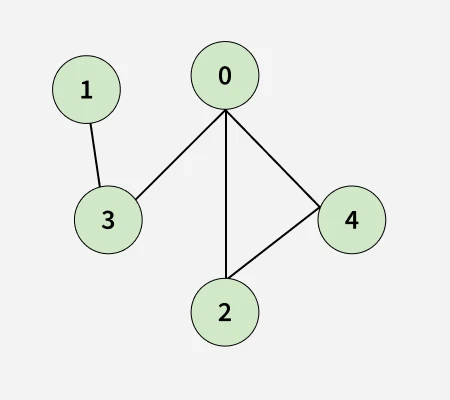
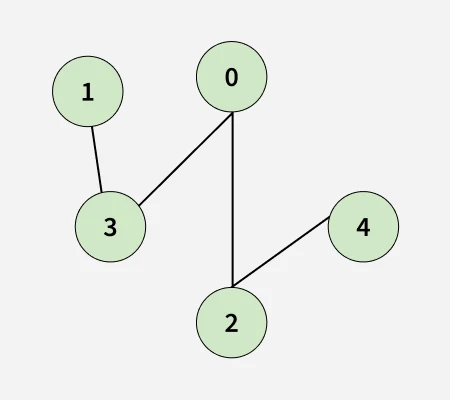

[990. Satisfiability of Equality Equations - Leetcode](https://leetcode.com/problems/satisfiability-of-equality-equations/description/)